# Imports 

## Import des librairies

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

## Import des données 

In [2]:
dispo_alimentaire = pd.read_csv('data/dispo_alimentaire.csv')

In [3]:
aide_alimentaire = pd.read_csv('data/aide_alimentaire.csv')

In [4]:
population = pd.read_csv('data/population.csv')

In [5]:
sous_nutrition = pd.read_csv('data/sous_nutrition.csv')

# EDA

In [12]:
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [8]:
dispo_alimentaire.isnull().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [9]:
aide_alimentaire.isnull().sum()

Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64

In [10]:
population.isnull().sum()

Zone      0
Année     0
Valeur    0
dtype: int64

In [11]:
sous_nutrition.isnull().sum()

Zone        0
Année       0
Valeur    594
dtype: int64

In [29]:
def ratio_null(dataset):
    null = dataset.isnull().sum()
    for n in dataset:
        null = dataset.isnull().sum()
        ratio = round(len(n)/len(null),2)
        print(f' le nombre de valeurs manquantes est {ratio} pour {n}')

In [30]:
ratio_null(dispo_alimentaire)

 le nombre de valeurs manquantes est 0.22 pour Zone
 le nombre de valeurs manquantes est 0.39 pour Produit
 le nombre de valeurs manquantes est 0.39 pour Origine
 le nombre de valeurs manquantes est 1.17 pour Aliments pour animaux
 le nombre de valeurs manquantes est 1.06 pour Autres Utilisations
 le nombre de valeurs manquantes est 2.56 pour Disponibilité alimentaire (Kcal/personne/jour)
 le nombre de valeurs manquantes est 3.0 pour Disponibilité alimentaire en quantité (kg/personne/an)
 le nombre de valeurs manquantes est 3.39 pour Disponibilité de matière grasse en quantité (g/personne/jour)
 le nombre de valeurs manquantes est 3.11 pour Disponibilité de protéines en quantité (g/personne/jour)
 le nombre de valeurs manquantes est 1.33 pour Disponibilité intérieure
 le nombre de valeurs manquantes est 1.28 pour Exportations - Quantité
 le nombre de valeurs manquantes est 1.28 pour Importations - Quantité
 le nombre de valeurs manquantes est 0.56 pour Nourriture
 le nombre de valeurs 

In [31]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [34]:
new = dispo_alimentaire.merge(sous_nutrition, on = "Zone", how = "left", indicator = True)

In [36]:
new

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,_merge
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,...,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2012-2014,8.6,both
1,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,...,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2013-2015,8.8,both
2,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,...,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2014-2016,8.9,both
3,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,...,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2015-2017,9.7,both
4,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,...,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2016-2018,10.5,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92680,Îles Salomon,"Épices, Autres",vegetale,NaN,NaN,4.0,0.48,0.21,0.15,0.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2013-2015,<0.1,both
92681,Îles Salomon,"Épices, Autres",vegetale,NaN,NaN,4.0,0.48,0.21,0.15,0.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2014-2016,<0.1,both
92682,Îles Salomon,"Épices, Autres",vegetale,NaN,NaN,4.0,0.48,0.21,0.15,0.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2015-2017,<0.1,both
92683,Îles Salomon,"Épices, Autres",vegetale,NaN,NaN,4.0,0.48,0.21,0.15,0.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2016-2018,<0.1,both


In [38]:
dispo_alimentaire.duplicated().sum()

0

In [39]:
sous_nutrition.duplicated().sum()

0

In [46]:
nunique = new[new['_merge'] != "both"]

In [47]:
nunique

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,_merge
68700,Royaume-Uni,Abats Comestible,animale,0.0,NaN,7.0,1.99,0.20,0.89,126.0,...,67.0,126.0,NaN,162.0,NaN,NaN,0.0,NaN,NaN,left_only
68701,Royaume-Uni,"Agrumes, Autres",vegetale,NaN,NaN,0.0,0.33,0.00,0.00,21.0,...,24.0,21.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,left_only
68702,Royaume-Uni,"Alcool, non Comestible",vegetale,NaN,582.0,NaN,NaN,NaN,NaN,582.0,...,680.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,left_only
68703,Royaume-Uni,Aliments pour enfants,vegetale,NaN,NaN,15.0,1.50,0.12,0.63,95.0,...,101.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
68704,Royaume-Uni,Ananas,vegetale,NaN,NaN,4.0,3.41,0.01,0.03,223.0,...,231.0,216.0,7.0,NaN,NaN,NaN,0.0,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81604,Tchéquie (la),Viande de Suides,animale,NaN,NaN,178.0,41.17,14.64,10.60,441.0,...,299.0,441.0,NaN,243.0,NaN,0.0,0.0,NaN,NaN,left_only
81605,Tchéquie (la),Viande de Volailles,animale,NaN,NaN,71.0,19.09,4.78,6.48,204.0,...,101.0,204.0,NaN,153.0,NaN,0.0,NaN,NaN,NaN,left_only
81606,Tchéquie (la),"Viande, Autre",animale,NaN,NaN,13.0,4.06,0.54,1.95,44.0,...,23.0,43.0,NaN,40.0,NaN,NaN,0.0,NaN,NaN,left_only
81607,Tchéquie (la),Vin,vegetale,NaN,NaN,18.0,9.17,NaN,0.00,160.0,...,142.0,98.0,NaN,49.0,NaN,62.0,0.0,NaN,NaN,left_only


In [48]:
nunique['Zone'].unique()

array(['Royaume-Uni', 'Tchéquie (la)'], dtype=object)

In [49]:
dispo_alimentaire['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize', 'Bermudes',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brunéi Darussalam', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, Taiwan Province de',
       'Chine, continentale', 'Chypre', 'Colombie', 'Congo', 'Costa Rica',
       'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti',
       'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Eswatini',
       'Fidji', 'Finlande', 'France', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Géorgie', 'H

In [50]:
# Etudes des NaN, tentative d'imputation

In [52]:
dispo_alimentaire.isnull().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [72]:
alimA = dispo_alimentaire.loc[dispo_alimentaire['Aliments pour animaux'] == 0.0]

In [73]:
alimA

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
49,Afghanistan,"Sucre, betterave",vegetale,0.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,15.0,NaN,15.0,NaN
60,Afrique du Sud,Abats Comestible,animale,0.0,48.0,17.0,4.81,0.53,2.58,302.0,10.0,71.0,254.0,NaN,241.0,NaN,NaN,NaN
105,Afrique du Sud,Huiles de Poissons,animale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,1.0,0.0,0.0,NaN,1.0,NaN,NaN,0.0
125,Afrique du Sud,Perciform,animale,0.0,0.0,2.0,2.16,0.04,0.43,114.0,74.0,26.0,114.0,NaN,162.0,NaN,NaN,0.0
128,Afrique du Sud,"Plantes Oleiferes, Autre",vegetale,0.0,1.0,0.0,0.00,0.00,0.00,16.0,17.0,4.0,0.0,0.0,23.0,0.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15564,Îles Salomon,Lait - Excl Beurre,animale,0.0,NaN,19.0,11.52,0.70,1.05,7.0,NaN,5.0,6.0,0.0,1.0,NaN,NaN,NaN
15567,Îles Salomon,Manioc,vegetale,0.0,NaN,15.0,4.97,0.03,0.12,3.0,NaN,NaN,3.0,0.0,3.0,NaN,NaN,NaN
15581,Îles Salomon,"Plantes Oleiferes, Autre",vegetale,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12.0,623.0,63.76,1.36,10.90,49.0,0.0,47.0,36.0,1.0,3.0,0.0,NaN,0.0


In [74]:
# observation retenur la colonne 'Aliments pour Animaux' nest pas exploitable, on va pouvoir la droper

In [87]:
util = dispo_alimentaire.loc[(dispo_alimentaire['Autres Utilisations'] == 0.0)&(dispo_alimentaire['Aliments pour animaux'] == 0.0)]

In [88]:
util

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
105,Afrique du Sud,Huiles de Poissons,animale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,1.0,0.0,0.0,NaN,1.0,NaN,NaN,0.0
125,Afrique du Sud,Perciform,animale,0.0,0.0,2.0,2.16,0.04,0.43,114.0,74.0,26.0,114.0,NaN,162.0,NaN,NaN,0.0
131,Afrique du Sud,"Poissons Marins, Autres",animale,0.0,0.0,0.0,0.07,0.00,0.02,4.0,3.0,1.0,4.0,NaN,6.0,NaN,NaN,0.0
221,Albanie,"Plantes Oleiferes, Autre",vegetale,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
225,Albanie,Poissons Pelagiques,animale,0.0,0.0,4.0,1.44,0.18,0.47,5.0,8.0,12.0,5.0,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15227,Émirats arabes unis,Racines nda,vegetale,0.0,0.0,3.0,1.21,0.01,0.05,11.0,2.0,13.0,11.0,NaN,NaN,NaN,NaN,NaN
15230,Émirats arabes unis,Seigle,vegetale,0.0,0.0,NaN,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15315,Équateur,"Poissons Marins, Autres",animale,0.0,0.0,1.0,0.30,0.02,0.09,5.0,0.0,4.0,5.0,NaN,1.0,NaN,NaN,0.0
15410,États-Unis d'Amérique,Poissons Eau Douce,animale,0.0,0.0,8.0,5.23,0.31,1.28,1793.0,367.0,1429.0,1673.0,NaN,730.0,120.0,NaN,0.0


In [89]:
prod = dispo_alimentaire[dispo_alimentaire['Produit'] == "Perciform" ]

In [90]:
prod

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
125,Afrique du Sud,Perciform,animale,0.0,0.0,2.0,2.16,0.04,0.43,114.0,74.0,26.0,114.0,NaN,162.0,NaN,NaN,0.0
218,Albanie,Perciform,animale,NaN,0.0,1.0,0.98,0.02,0.22,3.0,0.0,1.0,3.0,NaN,2.0,NaN,NaN,NaN
310,Algérie,Perciform,animale,NaN,0.0,0.0,0.42,0.01,0.09,17.0,0.0,5.0,17.0,NaN,12.0,NaN,NaN,NaN
405,Allemagne,Perciform,animale,0.0,0.0,20.0,4.09,1.35,1.83,339.0,490.0,739.0,339.0,NaN,67.0,NaN,NaN,22.0
488,Angola,Perciform,animale,NaN,0.0,7.0,6.12,0.13,1.44,131.0,0.0,20.0,131.0,NaN,111.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15216,Émirats arabes unis,Perciform,animale,NaN,0.0,13.0,13.12,0.25,2.50,123.0,6.0,58.0,123.0,NaN,46.0,NaN,NaN,25.0
15309,Équateur,Perciform,animale,NaN,0.0,0.0,0.30,0.01,0.06,5.0,20.0,1.0,5.0,NaN,23.0,NaN,NaN,0.0
15405,États-Unis d'Amérique,Perciform,animale,355.0,0.0,9.0,4.22,0.49,1.09,2025.0,1282.0,853.0,1350.0,NaN,2454.0,320.0,NaN,0.0
15497,Éthiopie,Perciform,animale,NaN,0.0,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Produit', ylabel='count'>

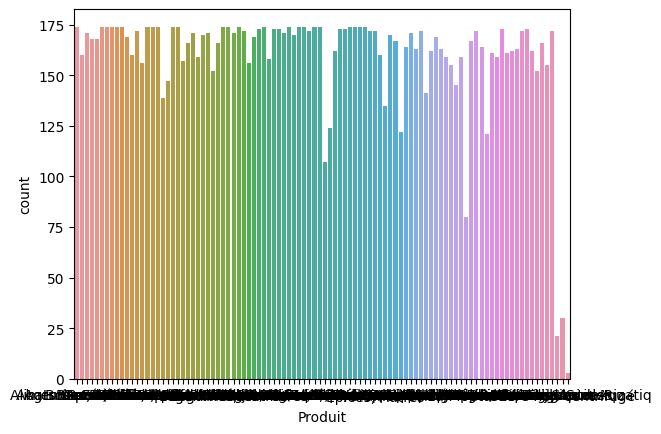

In [106]:
sns.countplot(x=dispo_alimentaire["Produit"])

In [109]:
prod = dispo_alimentaire["Produit"]
pays = dispo_alimentaire["Zone"]
origine = dispo_alimentaire["Origine"]

In [134]:
pays.value_counts()

Inde                                          97
Japon                                         97
République-Unie de Tanzanie                   96
Brésil                                        96
Indonésie                                     96
                                              ..
Timor-Leste                                   61
République populaire démocratique de Corée    61
Afghanistan                                   60
Turkménistan                                  57
Lesotho                                       53
Name: Zone, Length: 174, dtype: int64

In [135]:
prod.value_counts()

Abats Comestible          174
Fruits, Autres            174
Poissons Eau Douce        174
Maïs                      174
Pommes                    174
                         ... 
Sucre, betterave          107
Ignames                    80
Sucre non centrifugé       30
Huile de Son de Riz        21
Viande de Anim Aquatiq      3
Name: Produit, Length: 98, dtype: int64

In [136]:
origine.value_counts()

vegetale    11896
animale      3709
Name: Origine, dtype: int64

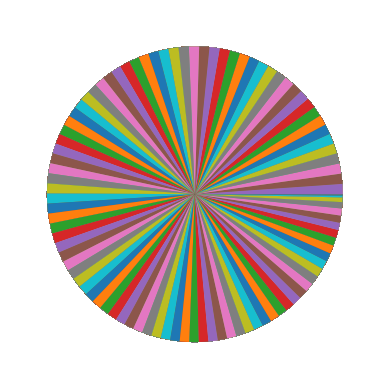

In [140]:
for p in pays.unique():
    plt.pie(prod.value_counts())